# Take the Low Road: Floodplain Connectivity in Boulder, CO
Restoring floodplain connectivity encourages water to flow into side channels and ponds, which ultimately mitigates the impact of heavy flooding. We investigated different ways to visualize this process through aerial imagery, elevation models, and graphs. Our results will be used to help landuse planners guide restoration practices in the St. Vrain watershed.

**Collaborators and Acknowledgements**<br>
Lindsay Chipman, Julia Sobczak, Matthew Bitters, and [The Watershed Center](https://watershed.center/). This notebook constitues the final project for the University of Colorado Earth Data Analytics Professional Certificate, special thanks to the [Earth Lab](https://www.earthdatascience.org/) and Dr. Elsa Culler!

![](media/LG_02.jpg)
*Image source: Julia Sobczak, DJI mini3*

## What is a floodplain?
A floodplain is the area adjacent to a stream that becomes inundated with water when a flood occurs. This space allows the flood to "spread out" and release energy and suspended objects such as sediment, logs, and debris. By reducing the flow of water down the stream corridor, floodplains effectively mitigate destruction to buildings and other infrastructure downstream. 

<img src="media/floodplain.jpg" width="50%"/>
Image Source: American Rivers. 2016. Reconnecting Rivers to Floodplains Returning natural functions to restore rivers and benefit communities. https://www.americanrivers.org/wp-content/uploads/2016/06/ReconnectingFloodplains_WP_Final.pdf


BUT this can only happen if the floodplain is "available" to the stream i.e., if the area around the stream is low enough to actually be affected when floodwaters appear. If a floodplain is situated above the highest flow of water, it will not be inundated with water and the floodplain will not act as it should - we call this a **disconnected floodplain**.

Below is our Apple Valley site - notice how there is only one channel of water and the land around the stream is relatively high and thus, inaccessible to the stream. If a large flood ran through here, the water would funnel down the "shoot" with dangerous strength and speed encouraging erosion and demolishing anything in its path.
<video width="100%" height="100%" 
       src="media/AV_00.mp4"  
       controls>
</video>

A **connected floodplain** is an area near the stream that can accept floodwaters and act as a buffer to potentially dangerous flows down the stream corridor. A well-connected floodplain can help save infrastructure and increase habitat resiliency to destructive flooding events by:
* Dispersing the force of a flood, which reduces destruction to mand-made structures along the stream
* Maintaining water quality by reducing sediment/fine particles flowing downstream
* Reducing erosion via plants and plant roots growing along the banks (encouraged by nutrients from floodwaters)
* Capturing high levels of carbon due on the physical properties of wetland soil


This is our Legacy 1 site - you can tell there is a lot more complexity and side channels for the water to flow into, the extent of vegetation suggests the land around the stream is relatively low and therefore "connected". If flooding occured here, the water would flow into many side channels and ponds which reduces its speed and encourages suspended objects to "drop" onto the land instead of continuing downstream.

<video width="100%" height="100%"
       src="media/LG_00.mp4"
       controls>
</video>

In [2]:
# Import packages
import os
import pathlib

from lidar_processing import applevalley_lidar_dtm, applevalley_uav_rem 
from load_plot_model import plot_model, plot_hists
import matplotlib.pyplot as plt
from plot_site_map import plot_sites, plot_sites_folium

/Users/lchipman/earth-analytics/data/watershed-project is now the working directory


## The St. Vrain Watershed (Boulder, CO)
Our five study sites are located in the St. Vrain Watershed located in the northwest foothills of Colorado, USA. This is a heavily populated area with beautiful views and lots of opportunity for outdoor recreation including hiking, kayaking, and mountain biking.

In [2]:
# Run plot site map
plot_sites_folium()

/Users/lchipman/opt/miniconda3/envs/earth-analytics-py2/lib/python3.10/site-packages/folium/utilities.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
/Users/lchipman/opt/miniconda3/envs/earth-analytics-py2/lib/python3.10/site-packages/folium/utilities.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if math.isnan(float(coord)):
/Users/lchipman/opt/miniconda3/envs/earth-analytics-py2/lib/python3.10/site-packages/folium/utilities.py:79: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(x) for x in coords]


## Using elevation models to evaluate floodplain connectivity
A **Digital Terrain Model (DTM)** is a representation of the topographic surface of the Earth excluding trees, buildings, and any other surface objects. We obtained images of the study sites from drones or **Unmanned Aerial Vehicles (UAV)** that the Watershed Center flew in 2022. From these UAV images, we created DEMs using the software [Agisoft Metashape](https://www.agisoft.com/), which performs photogrammetric processing of digital images to generate 3D spatial data. We also obtained DTMs generated from Light Detection and Ranging or **LiDAR**, which is a remote sensing method used to examine the surface of the Earth. One goal of our project is to compare the pros and cons of each DTM source (UAV vs. LiDAR) for investigating floodplain connectivity. 


The image below shows an example of a **DTM** obtained from LiDAR imagery for the Apple Valley site. The color bar on the right shows the elevation in feet above sea level. The main channel is visible as the lowest elevations, and other features, such as sidechannels are also visible.

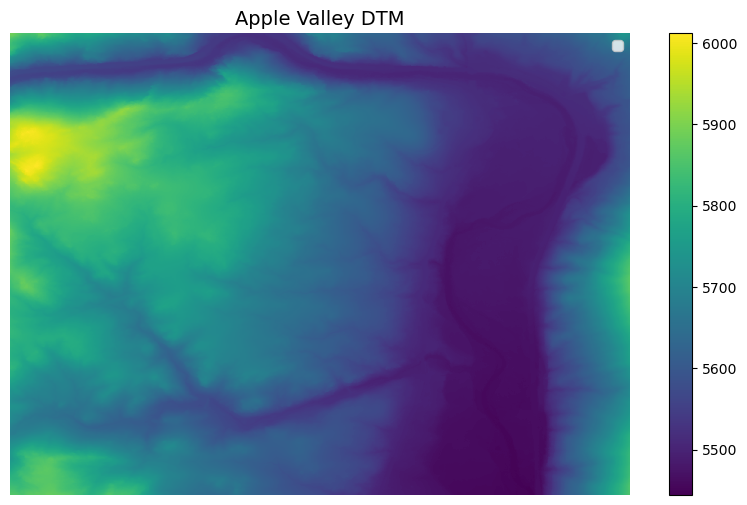

In [6]:
# Plot example DTM - Apple Valley
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_model(model=applevalley_lidar_dtm, 
           title='Apple Valley DTM', 
           coarsen=True, 
           ax=ax)

## Visualizing the Results - REM Plots
We then used the UAV-derived DTMs to generate **Relative Elevation Models (REMs)**, which are DTMs normalized to the stream channel, using two methods:
1. [REM Generator Tool](https://drive.google.com/drive/folders/1qcsaKrh-NPplq4P3escRgNW6mokA_QLL). This is a free tool available from the [Colorado Water Conservation Board's Colorado Fluvial Hazard Zone Program](https://www.coloradofhz.com/). However, it requires an [ArcGIS](https://www.esri.com/en-us/arcgis/products/arcgis-desktop/overview) license to run.
2. [REMMaker](https://github.com/OpenTopography/RiverREM/blob/main/riverrem/REMMaker.py) tool available on github at [RiverREM](https://github.com/OpenTopography/RiverREM/tree/main). This is an open-source python tool.

Below is a Relative Elevation Model generated with the REM Generator Tool (method 1). It displays the elevation relative to the stream channel. The color bar on the right shows the elevation in meters above the streambed. Small changes in elevation represent changes in the topography or fluvial landform. REMs can reveal older channels that are no longer the main channel as the morphology has shifted over time but may still retain water during flooding.

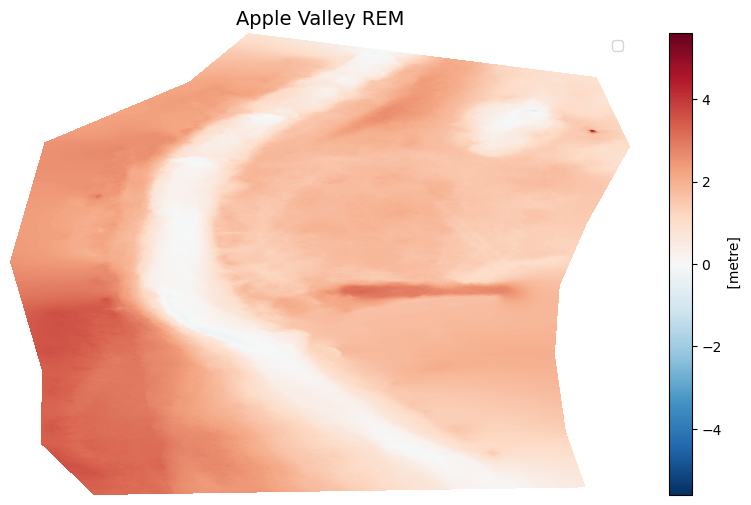

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_model(model=applevalley_uav_rem, 
           title='Apple Valley REM', 
           coarsen=True, 
           ax=ax)

## Interpreting the Results - Histograms
Histograms show the frequency (count, y-axis) of each elevation (meters, x-axis). A smoother histogram may indicate greater connectivity whereas sharp changes in elevations may indicate a disconnected floopdplain. We can also compare histograms for the REMs created by the [REM Generator Tool](https://drive.google.com/drive/folders/1qcsaKrh-NPplq4P3escRgNW6mokA_QLL) (in ArcMap) versus those for the REMs created with the [REMMaker](https://github.com/OpenTopography/RiverREM/blob/main/riverrem/REMMaker.py) tool (in python).

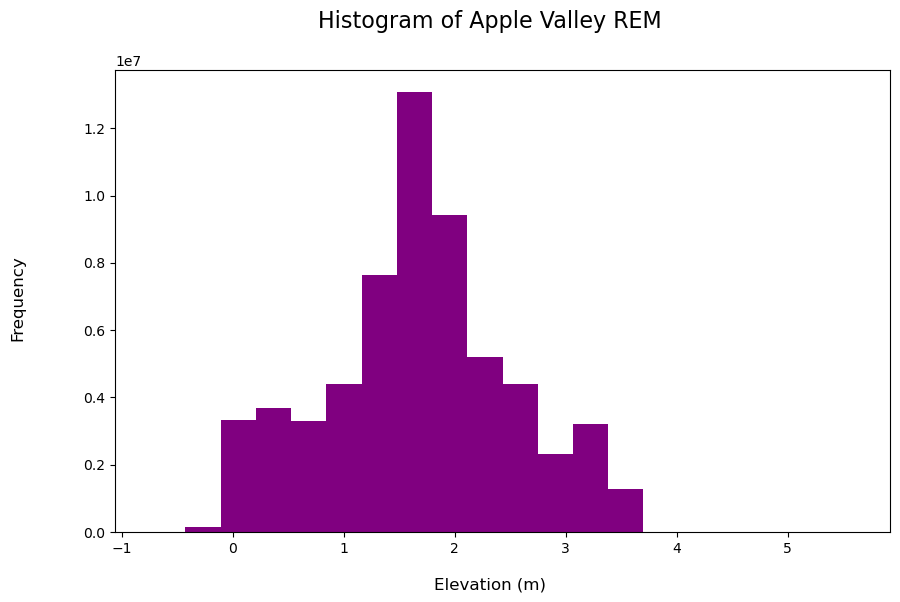

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_hists(model=applevalley_uav_rem, 
           titles='', 
           main_title='Histogram of Apple Valley REM', 
           color='purple',
           fig=fig, 
           ax=ax)

In [3]:
# Export notebook to HTML
# Move to the local repository directory where this notebook is saved
repo_dir = os.path.join(
    pathlib.Path.home(), 'earth-analytics', 'watershed-project')
try:
    os.chdir(repo_dir)
except:
    print('{} does not exist. Please make sure you forked the watershed'
          'repository to the correct location. See README' 
          'for instructions'.format(repo_dir))
else:
    print('Changed directory to {}'.format(repo_dir))
    !jupyter nbconvert --to html --no-input draft_blog_post.ipynb

Changed directory to /Users/lchipman/earth-analytics/watershed-project
Variables may not be used as commands. In fish, please define a function or use 'eval $CONDA_EXE'.
- (line 1): $CONDA_EXE shell.fish $cmd $argv
            ^
in command substitution
	called on line 67 of file -

in function 'conda'
	called on line 147 of file -
	with parameter list 'activate base'

from sourcing file -
	called on line 11 of file ~/.config/fish/config.fish

from sourcing file ~/.config/fish/config.fish
	called during startup

[NbConvertApp] Converting notebook draft_blog_post.ipynb to html
[NbConvertApp] Writing 1348861 bytes to draft_blog_post.html
